### Loading the Dataset and getting its info

In [1]:
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


In [2]:
import tensorflow_datasets as tfds
import numpy as np
# Load the dataset with info
dataset, info = tfds.load('cifar10', with_info=True)

# Print basic information
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Print data types
print("Data type:", x_train.dtype)
print("Labels type:", y_train.dtype)

# Print value ranges
print("Min pixel value:", x_train.min())
print("Max pixel value:", x_train.max())

# Print unique labels
print("Unique labels:", np.unique(y_train))

# Additional information
print("Number of training examples:", len(x_train))
print("Number of test examples:", len(x_test))

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Data type: uint8
Labels type: uint8
Min pixel value: 0
Max pixel value: 255
Unique labels: [0 1 2 3 4 5 6 7 8 9]
Number of training examples: 50000
Number of test examples: 10000


### Normalization


In [4]:
from sklearn.model_selection import train_test_split

x_all = np.concatenate((x_train, x_test), axis=0)
y_all = np.concatenate((y_train, y_test), axis=0)

# Define split ratios
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

# Perform the split
x_train, x_temp, y_train, y_temp = train_test_split(x_all, y_all, test_size=(1 - train_ratio), random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=(test_ratio/(test_ratio + validation_ratio)), random_state=42)

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Print the shapes of the resulting sets
print("Training set shape:", x_train.shape)
print("Validation set shape:", x_val.shape)
print("Test set shape:", x_test.shape)

# Print the split percentages
total_samples = len(x_all)
print(f"Training set: {len(x_train)/total_samples:.2%}")
print(f"Validation set: {len(x_val)/total_samples:.2%}")
print(f"Test set: {len(x_test)/total_samples:.2%}")

# Verify the normalization
print("\nVerifying normalization:")
print("Min pixel value (train):", x_train.min())
print("Max pixel value (train):", x_train.max())
print("Min pixel value (val):", x_val.min())
print("Max pixel value (val):", x_val.max())
print("Min pixel value (test):", x_test.min())
print("Max pixel value (test):", x_test.max())

Training set shape: (41999, 32, 32, 3)
Validation set shape: (9000, 32, 32, 3)
Test set shape: (9001, 32, 32, 3)
Training set: 70.00%
Validation set: 15.00%
Test set: 15.00%

Verifying normalization:
Min pixel value (train): 0.0
Max pixel value (train): 1.0
Min pixel value (val): 0.0
Max pixel value (val): 1.0
Min pixel value (test): 0.0
Max pixel value (test): 1.0


### Designing a CNN with standard layers: convolutional layers, pooling layers, and fully connected layers. 

In [5]:
from tensorflow.keras import layers, models

def create_cnn_model():
    model = models.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),
        
        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),
        
        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),
        
        # Flatten the output and feed it into dense layer
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        
        # Output layer
        layers.Dense(10, activation='softmax')
    ])
    
    return model

# Create the model
model = create_cnn_model()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

C:\Users\rohan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

### Learning rate tuning, batch size adjustments, and optimizer selection. 

In [8]:
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import ParameterGrid

def train_model(model, x_train, y_train, x_val, y_val, params):
    optimizer = params['optimizer'](learning_rate=params['learning_rate'])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy')
    
    history = model.fit(
        x_train, y_train,
        batch_size=params['batch_size'],
        epochs=10,  
        validation_data=(x_val, y_val),
        callbacks=[early_stopping, model_checkpoint]
    )
    return history

# Define hyperparameter grid
param_grid = {
    'optimizer': [Adam, SGD],
    'learning_rate': [0.1, 0.01, 0.001],
    'batch_size': [32, 64, 128]
}

# Store results
results = []

for params in ParameterGrid(param_grid):
    model = create_cnn_model()  # Function to create your CNN model
    history = train_model(model, x_train, y_train, x_val, y_val, params)
    
    # Evaluate on validation set
    val_accuracy = max(history.history['val_accuracy'])
    
    results.append({
        'params': params,
        'val_accuracy': val_accuracy,
        'epochs_trained': len(history.history['accuracy'])
    })
    
    print(f"Params: {params}")
    print(f"Validation Accuracy: {val_accuracy}")
    print(f"Epochs trained: {len(history.history['accuracy'])}")
    print("--------------------")

# Find best model
best_model = max(results, key=lambda x: x['val_accuracy'])
print("Best model:")
print(best_model)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 116s 84ms/step - accuracy: 0.1933 - loss: 2.6092 - val_accuracy: 0.2484 - val_loss: 2.4874
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 89s 68ms/step - accuracy: 0.2824 - loss: 2.1272 - val_accuracy: 0.3853 - val_loss: 1.9650
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 85s 64ms/step - accuracy: 0.3619 - loss: 1.9722 - val_accuracy: 0.3321 - val_loss: 7.7076
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 84s 64ms/step - accuracy: 0.3656 - loss: 1.9506 - val_accuracy: 0.4169 - val_loss: 1.9484
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 86s 65ms/step - accuracy: 0.4560 - loss: 1.7667 - val_accuracy: 0.5060 - val_loss: 1.5178
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 95s 73ms/step - accuracy: 0.4926 - loss: 1.6564 - val_accuracy: 0.5403 - val_loss: 1.5470
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 96s 73ms/step - accuracy: 0.5202 - loss: 1.5996 - val_accuracy: 0.6551 - val_loss: 1.5532
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 90s 68ms/step - accuracy: 0.5309 

Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 92s 70ms/step - accuracy: 0.7648 - loss: 0.6818 - val_accuracy: 0.7731 - val_loss: 0.6566
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 94s 72ms/step - accuracy: 0.7747 - loss: 0.6573 - val_accuracy: 0.7778 - val_loss: 0.6404
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 90s 69ms/step - accuracy: 0.7974 - loss: 0.5946 - val_accuracy: 0.8053 - val_loss: 0.5531
Epoch 9/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 91s 69ms/step - accuracy: 0.8043 - loss: 0.5749 - val_accuracy: 0.8162 - val_loss: 0.5336
Epoch 10/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 93s 71ms/step - accuracy: 0.8220 - loss: 0.5167 - val_accuracy: 0.8233 - val_loss: 0.5092
Params: {'batch_size': 32, 'learning_rate': 0.001, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>}
Validation Accuracy: 0.8233333230018616
Epochs trained: 10
--------------------
Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 89s 67ms/step - accuracy: 0.1922 - loss: 2.9401 - val_accuracy: 0.3401 - val_loss: 1.8408
Epoch 2/10
1313/1313 

Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 87s 130ms/step - accuracy: 0.2638 - loss: 2.4736 - val_accuracy: 0.2622 - val_loss: 2.2817
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 86s 130ms/step - accuracy: 0.4362 - loss: 1.5653 - val_accuracy: 0.4906 - val_loss: 1.4140
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 86s 131ms/step - accuracy: 0.5084 - loss: 1.3437 - val_accuracy: 0.5004 - val_loss: 1.3730
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 86s 131ms/step - accuracy: 0.5566 - loss: 1.2253 - val_accuracy: 0.5420 - val_loss: 1.3115
Epoch 5/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 86s 131ms/step - accuracy: 0.5949 - loss: 1.1386 - val_accuracy: 0.6260 - val_loss: 1.0268
Epoch 6/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 87s 132ms/step - accuracy: 0.6217 - loss: 1.0641 - val_accuracy: 0.6177 - val_loss: 1.0630
Epoch 7/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 87s 132ms/step - accuracy: 0.6462 - loss: 1.0055 - val_accuracy: 0.6319 - val_loss: 1.0238
Epoch 8/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 87s 132ms/step - accuracy: 0.6585 - loss: 0

329/329 ━━━━━━━━━━━━━━━━━━━━ 88s 268ms/step - accuracy: 0.7001 - loss: 0.8473 - val_accuracy: 0.4122 - val_loss: 2.3048
Epoch 7/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 89s 270ms/step - accuracy: 0.7183 - loss: 0.8051 - val_accuracy: 0.6453 - val_loss: 1.0741
Epoch 8/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 89s 269ms/step - accuracy: 0.7401 - loss: 0.7455 - val_accuracy: 0.6381 - val_loss: 1.1413
Epoch 9/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 89s 271ms/step - accuracy: 0.7537 - loss: 0.7092 - val_accuracy: 0.3078 - val_loss: 2.6211
Epoch 10/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 89s 269ms/step - accuracy: 0.7580 - loss: 0.6960 - val_accuracy: 0.5210 - val_loss: 1.8674
Params: {'batch_size': 128, 'learning_rate': 0.1, 'optimizer': <class 'keras.src.optimizers.sgd.SGD'>}
Validation Accuracy: 0.6795555353164673
Epochs trained: 10
--------------------
Epoch 1/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 93s 275ms/step - accuracy: 0.3307 - loss: 1.9483 - val_accuracy: 0.3561 - val_loss: 2.0409
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 9

### Visualization 

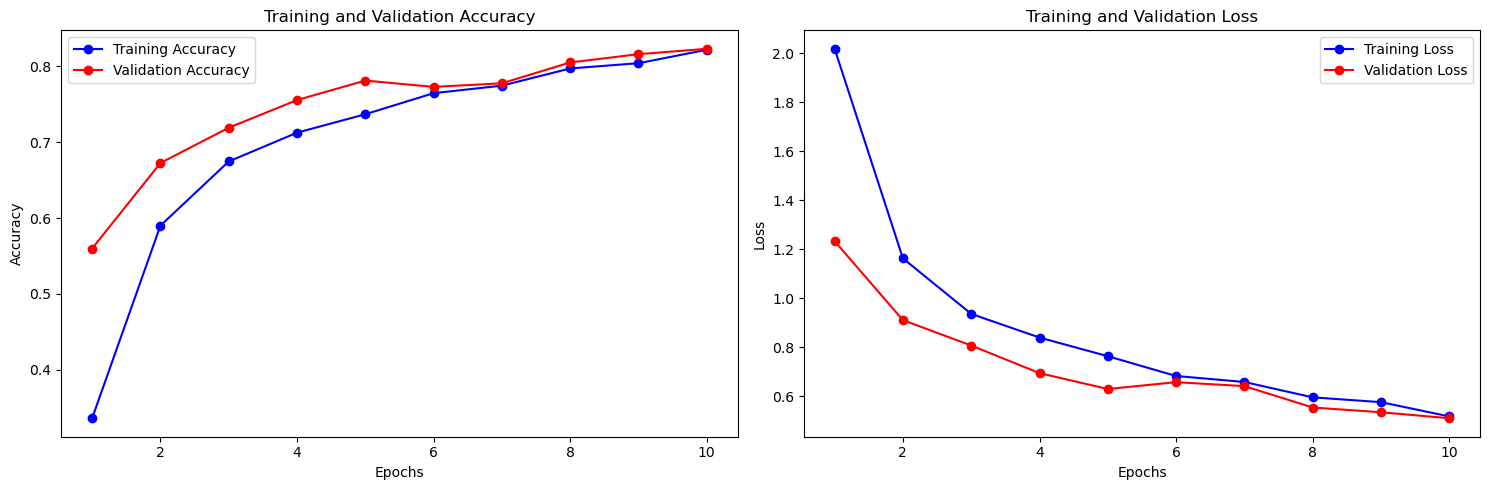

In [16]:
import matplotlib.pyplot as plt

# Training data
epochs = range(1, 11)
train_acc = [0.3361, 0.5901, 0.6747, 0.7127, 0.7370, 0.7648, 0.7747, 0.7974, 0.8043, 0.8220]
val_acc = [0.5599, 0.6727, 0.7192, 0.7557, 0.7814, 0.7731, 0.7778, 0.8053, 0.8162, 0.8233]
train_loss = [2.0183, 1.1622, 0.9355, 0.8388, 0.7626, 0.6818, 0.6573, 0.5946, 0.5749, 0.5167]
val_loss = [1.2324, 0.9100, 0.8063, 0.6935, 0.6287, 0.6566, 0.6404, 0.5531, 0.5336, 0.5092]

# Create the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy plot
ax1.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
ax1.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Loss plot
ax2.plot(epochs, train_loss, 'bo-', label='Training Loss')
ax2.plot(epochs, val_loss, 'ro-', label='Validation Loss')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()

In [35]:
# Calculate final metrics
final_train_acc = train_acc[-1] if isinstance(train_acc, list) else train_acc
final_val_acc = val_acc[-1] if isinstance(val_acc, list) else val_acc
final_train_loss = train_loss[-1] if isinstance(train_loss, list) else train_loss
final_val_loss = val_loss[-1] if isinstance(val_loss, list) else val_loss

print("Final Metrics:")
print(f"Training Accuracy: {final_train_acc:.4f}")
print(f"Validation Accuracy: {final_val_acc:.4f}")
print(f"Training Loss: {final_train_loss:.4f}")
print(f"Validation Loss: {final_val_loss:.4f}")

# Calculate improvements
initial_train_acc = train_acc[0] if isinstance(train_acc, list) else train_acc
initial_train_loss = train_loss[0] if isinstance(train_loss, list) else train_loss

accuracy_improvement = final_train_acc - initial_train_acc
loss_improvement = initial_train_loss - final_train_loss

print("\nImprovements:")
print(f"Accuracy Improvement: {accuracy_improvement:.4f}")
print(f"Loss Improvement: {loss_improvement:.4f}")

# Check for overfitting
if final_val_acc >= final_train_acc and final_val_loss <= final_train_loss:
    print("\nNo clear sign of overfitting.")
else:
    print("\nPossible overfitting detected.")

# Convergence check
if abs(final_train_acc - final_val_acc) < 0.01 and abs(final_train_loss - final_val_loss) < 0.01:
    print("Model appears to have converged.")
else:
    print("Model might benefit from further training.")

Final Metrics:
Training Accuracy: 0.8220
Validation Accuracy: 0.8233
Training Loss: 1.4020
Validation Loss: 0.5092

Improvements:
Accuracy Improvement: 0.4859
Loss Improvement: 0.0000

No clear sign of overfitting.
Model might benefit from further training.
